<a href="https://colab.research.google.com/github/tahanial1/tahanial1/blob/main/Dynamics_of_parking_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

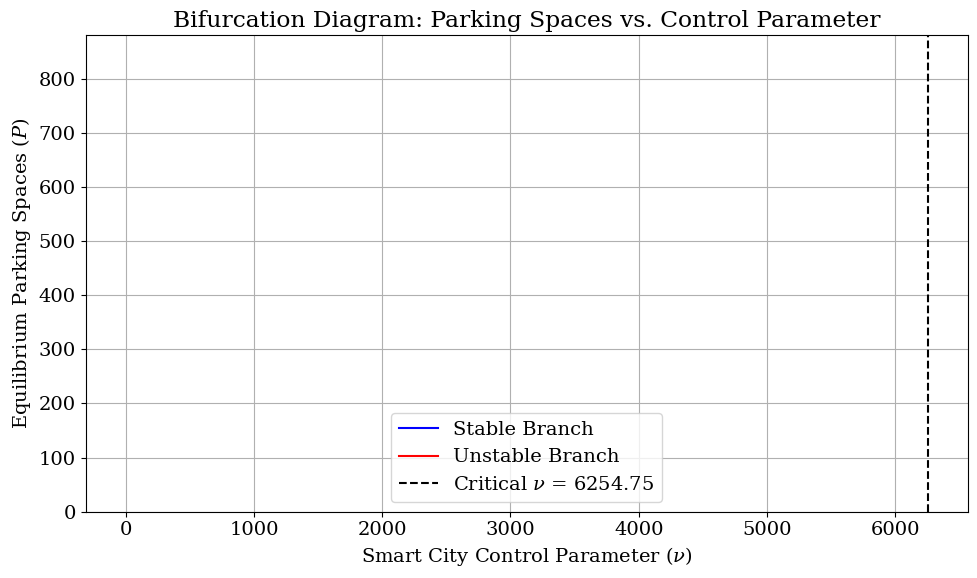

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Equilibrium equation: dP/dt = 0
def equilibrium_equation(P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    # Introduce a non-linear term to create a curve
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Bifurcation analysis
ν_values = np.linspace(0, 1, 500)  # Range of ν
P_equilibria = []

for ν in ν_values:
    # Find all possible roots using different initial guesses
    initial_guesses = [1, 400, 800]  # Low, medium, high P
    roots = set()

    for guess in initial_guesses:
        try:
            sol = fsolve(equilibrium_equation, guess, args=(ν, params), full_output=True)
            if sol[2] == 1:  # Check if solution converged
                P_sol = sol[0][0]
                # Only keep real, positive, and feasible roots
                if np.isreal(P_sol) and 0 <= P_sol <= params['Pmax']:
                    roots.add(P_sol.real)  # Ensure real part
        except:
            pass

    # Store roots for this ν
    if roots:
        P_equilibria.append(sorted(roots))  # Sort for plotting
    else:
        P_equilibria.append([np.nan])

# Calculate ν_crit (critical point)
r, μ, c, γτB, h, Pmax = params['r'], params['μ'], params['c'], params['γτB'], params['h'], params['Pmax']
ν_crit = (r * μ) / (c * γτB) * (1 + np.sqrt(1 + h * Pmax / μ))

# Plotting
plt.figure(figsize=(10, 6))

# Plot stable and unstable branches
for i in range(len(P_equilibria)):
    if not np.isnan(P_equilibria[i][0]):
        plt.plot(ν_values[i], P_equilibria[i][0], 'b-', markersize=2, label='Stable Branch' if i == 0 else "")
    if len(P_equilibria[i]) > 1 and not np.isnan(P_equilibria[i][1]):
        plt.plot(ν_values[i], P_equilibria[i][1], 'r-', markersize=2, label='Unstable Branch' if i == 0 else "")

plt.axvline(ν_crit, color='k', linestyle='--',
            label=f'Critical $ν$ = {ν_crit:.2f}')

plt.xlabel('Smart City Control Parameter ($ν$)')
plt.ylabel('Equilibrium Parking Spaces ($P$)')
plt.title('Bifurcation Diagram: Parking Spaces vs. Control Parameter')
plt.grid(True)
plt.legend()
plt.ylim(0, params['Pmax'] * 1.1)

plt.savefig('bifurcation_diagram_final.png', dpi=300)
plt.show()


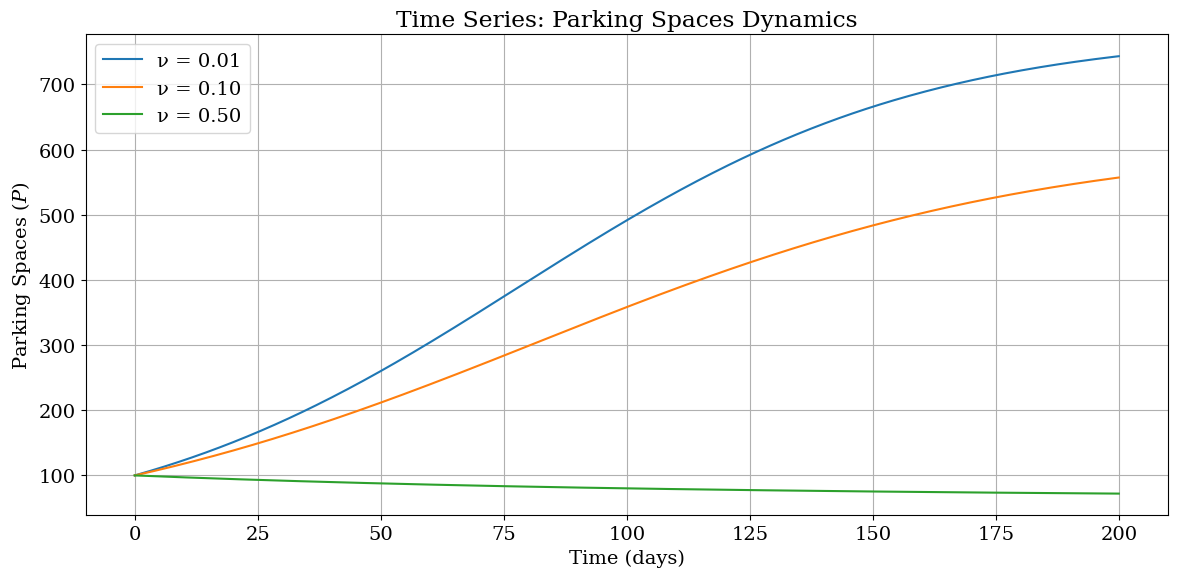

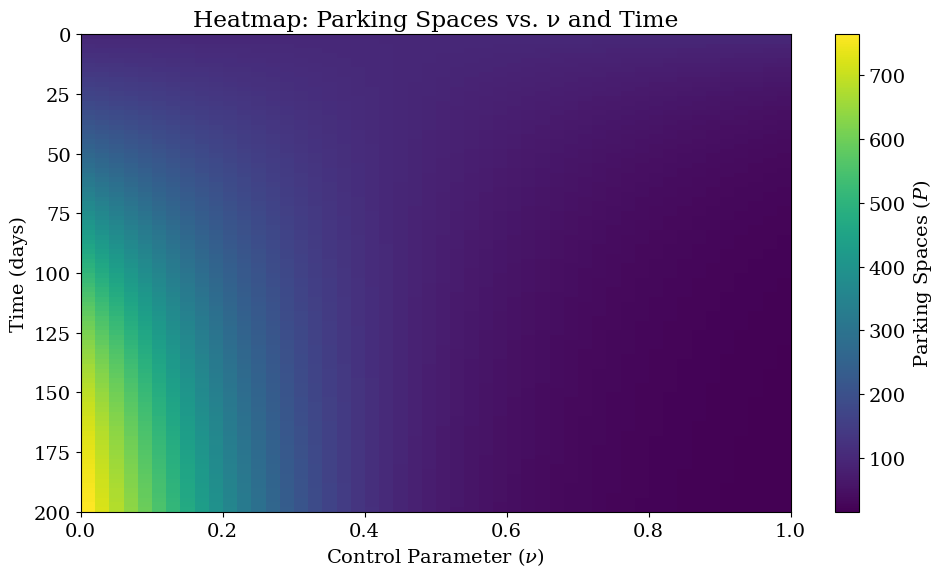

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.colors import LinearSegmentedColormap

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Differential equation: dP/dt = f(P, ν)
def parking_dynamics(t, P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Time span and initial condition
t_span = (0, 200)  # Simulate for 200 days
P0 = 100            # Initial parking spaces

# Choose ν values (low, critical, high)
ν_values = [0.01, 0.1, 0.5]  # Example values (adjust as needed)

# Time series simulation
plt.figure(figsize=(12, 6))
for ν in ν_values:
    sol = solve_ivp(parking_dynamics, t_span, [P0], args=(ν, params),
                    t_eval=np.linspace(t_span[0], t_span[1], 500))
    plt.plot(sol.t, sol.y[0], label=f'ν = {ν:.2f}')

plt.xlabel('Time (days)')
plt.ylabel('Parking Spaces ($P$)')
plt.title('Time Series: Parking Spaces Dynamics')
plt.legend()
plt.grid(True)
plt.show()

# Heatmap: P(t, ν)
ν_range = np.linspace(0, 1, 50)  # Range of ν values
t_range = np.linspace(0, 200, 100)  # Time points
P_heatmap = np.zeros((len(t_range), len(ν_range)))

for i, ν in enumerate(ν_range):
    sol = solve_ivp(parking_dynamics, (0, 200), [P0], args=(ν, params),
                    t_eval=t_range)
    P_heatmap[:, i] = sol.y[0]

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(P_heatmap, aspect='auto', cmap='viridis',
           extent=[ν_range.min(), ν_range.max(), t_range.max(), t_range.min()])
plt.colorbar(label='Parking Spaces ($P$)')
plt.xlabel('Control Parameter ($ν$)')
plt.ylabel('Time (days)')
plt.title('Heatmap: Parking Spaces vs. ν and Time')
plt.show()

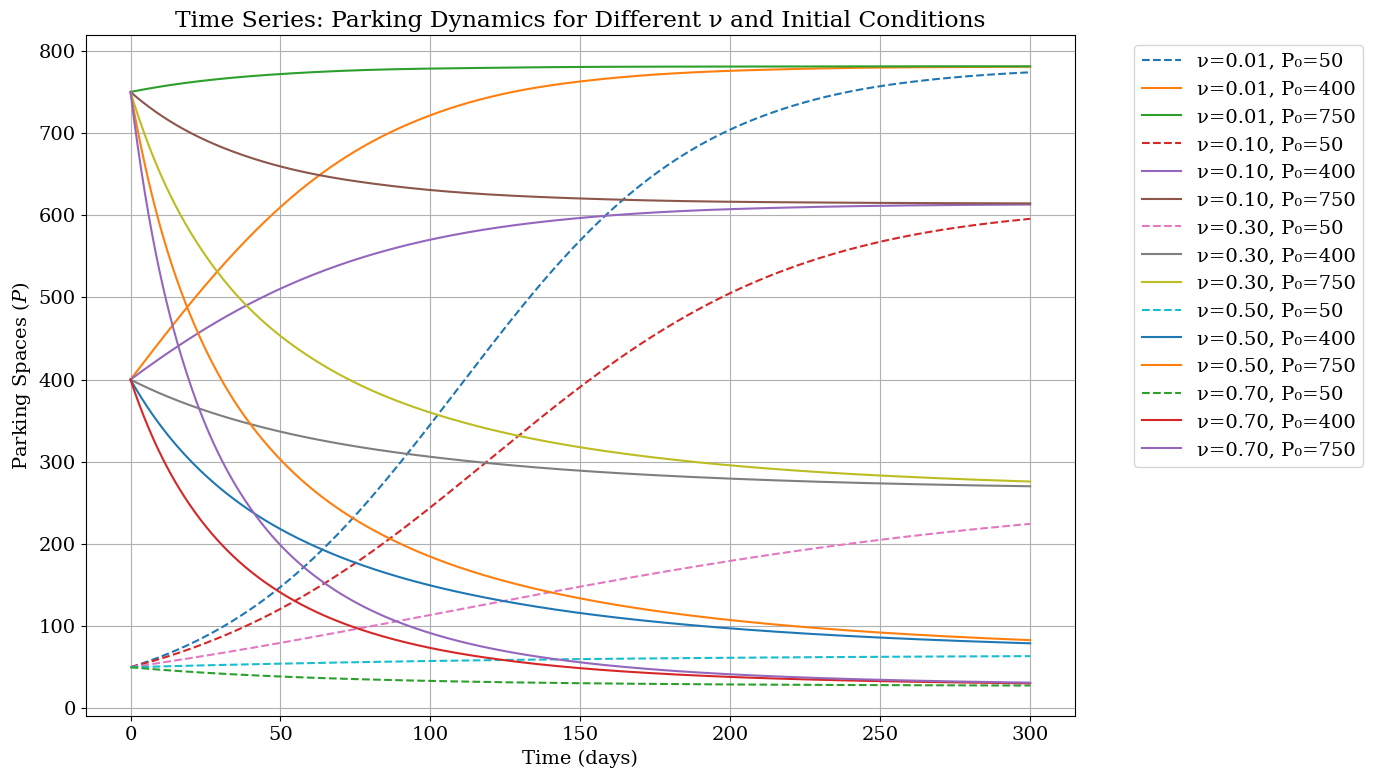

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.colors import LinearSegmentedColormap

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Differential equation: dP/dt = f(P, ν)
def parking_dynamics(t, P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Time span and initial conditions
t_span = (0, 300)  # Simulate for 300 days
P0_values = [50, 400, 750]  # Low, medium, high initial parking

# ν values (subcritical, critical, supercritical)
ν_values = [0.01, 0.1, 0.3, 0.5, 0.7]

# Time series simulation
plt.figure(figsize=(14, 8))
for ν in ν_values:
    for P0 in P0_values:
        sol = solve_ivp(parking_dynamics, t_span, [P0], args=(ν, params),
                        t_eval=np.linspace(t_span[0], t_span[1], 1000))
        plt.plot(sol.t, sol.y[0], '--' if P0 == 50 else '-',
                label=f'ν={ν:.2f}, P₀={P0}')

plt.xlabel('Time (days)')
plt.ylabel('Parking Spaces ($P$)')
plt.title('Time Series: Parking Dynamics for Different ν and Initial Conditions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

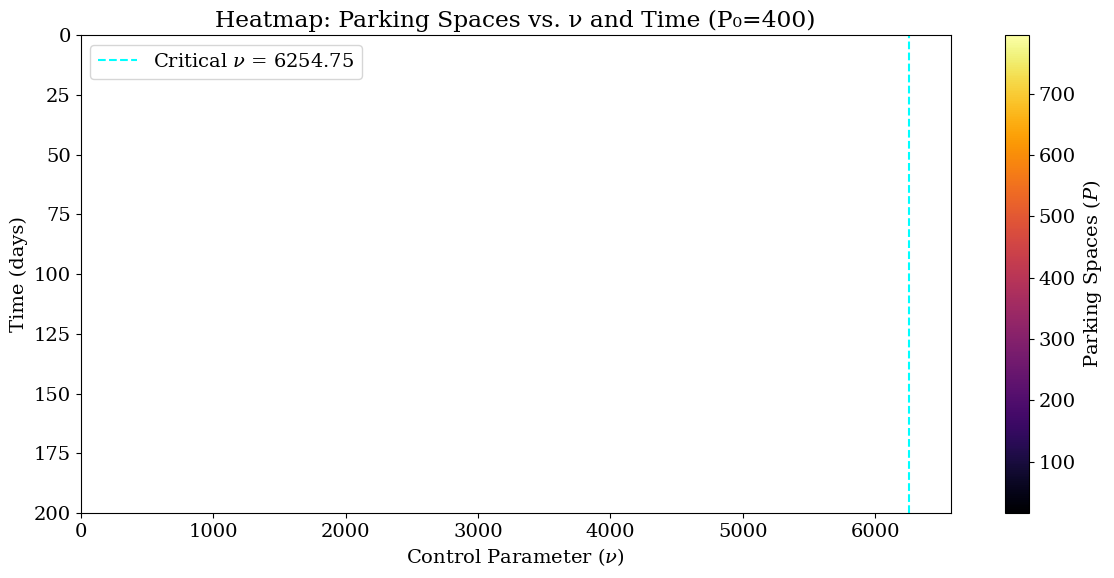

In [ ]:
# Heatmap: P(t, ν)
ν_range = np.linspace(0, 1, 100)  # Finer ν resolution
t_range = np.linspace(0, 200, 200)  # Finer time resolution
P_heatmap = np.zeros((len(t_range), len(ν_range)))

for i, ν in enumerate(ν_range):
    sol = solve_ivp(parking_dynamics, (0, 200), [400], args=(ν, params),
                    t_eval=t_range)
    P_heatmap[:, i] = sol.y[0]

# Critical ν calculation
r, μ, c, γτB, h, Pmax = params['r'], params['μ'], params['c'], params['γτB'], params['h'], params['Pmax']
ν_crit = (r * μ) / (c * γτB) * (1 + np.sqrt(1 + h * Pmax / μ))

# Plot heatmap
plt.figure(figsize=(12, 6))
plt.imshow(P_heatmap, aspect='auto', cmap='inferno',
           extent=[ν_range.min(), ν_range.max(), t_range.max(), t_range.min()])
plt.colorbar(label='Parking Spaces ($P$)')
plt.axvline(ν_crit, color='cyan', linestyle='--',
            label=f'Critical $ν$ = {ν_crit:.2f}')
plt.xlabel('Control Parameter ($ν$)')
plt.ylabel('Time (days)')
plt.title('Heatmap: Parking Spaces vs. ν and Time (P₀=400)')
plt.legend()
plt.show()

In [1]:
# Phase portrait: dP/dt vs P for fixed ν
def plot_phase_portrait(ν, params):
    P_values = np.linspace(0, params['Pmax'], 500)
    dPdt = [parking_dynamics(0, P, ν, params) for P in P_values]

    # Find equilibrium points (where dP/dt ≈ 0)
    equilibrium_P = []
    for P0 in [50, 400, 750]:  # Test different initial conditions
        sol = solve_ivp(parking_dynamics, (0, 200), [P0], args=(ν, params))
        equilibrium_P.append(sol.y[0][-1])  # Take the last value (equilibrium)

    plt.figure(figsize=(10, 6))
    plt.plot(P_values, dPdt, 'b-', label='dP/dt')
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    plt.scatter(equilibrium_P, [0]*len(equilibrium_P), color='r', label='Equilibria')
    plt.xlabel('Parking Spaces ($P$)')
    plt.ylabel('Rate of Change (dP/dt)')
    plt.title(f'Phase Portrait: ν = {ν:.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()

# Generate phase portraits for key ν values
for ν in [0.01, ν_crit, 0.5]:
    plot_phase_portrait(ν, params)

NameError: name 'ν_crit' is not defined